# Jewelry Price Optimisation 

# Data Preprocessing

Import necessary libraries

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

Loading the dataset with the column names found in the data dictionary

In [3]:
#import data
data = pd.read_csv('Jewelry_Dataset.csv')

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"

]

## Exploratory Data Analysis

In [4]:
data.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


Check for any null values

In [5]:
#check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

There is 48167 rows with null values at most

In [6]:
#data shape
data.shape

(95910, 13)

This is more than half the dataset

In [7]:
#feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

Checking for unique values shows that the SKU Quantity only has one value. The category and category ID are also not the same. There is possibly an issue there.

In [8]:
#describe the data
data.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [9]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [10]:
#duplicated values
num_duplicated = len(data.loc[data.duplicated()])
print(f"Number of duplicated rows: {num_duplicated}")

Number of duplicated rows: 2589


In [11]:
# features with a cardinality of 1
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [12]:
invariant_features

['SKU_Quantity']

Checking for cardinality shows only SKU Quantity is feature with a cardinality of 1 considering it has a value of 1 only

In [13]:
# check for label distribution
data["Price_USD"].skew()

np.float64(18.959060726259818)

The data is very positively skewed

In [14]:
data["Price_USD"].kurtosis()

np.float64(1054.8979068506162)

The kurtosis is also very heavy

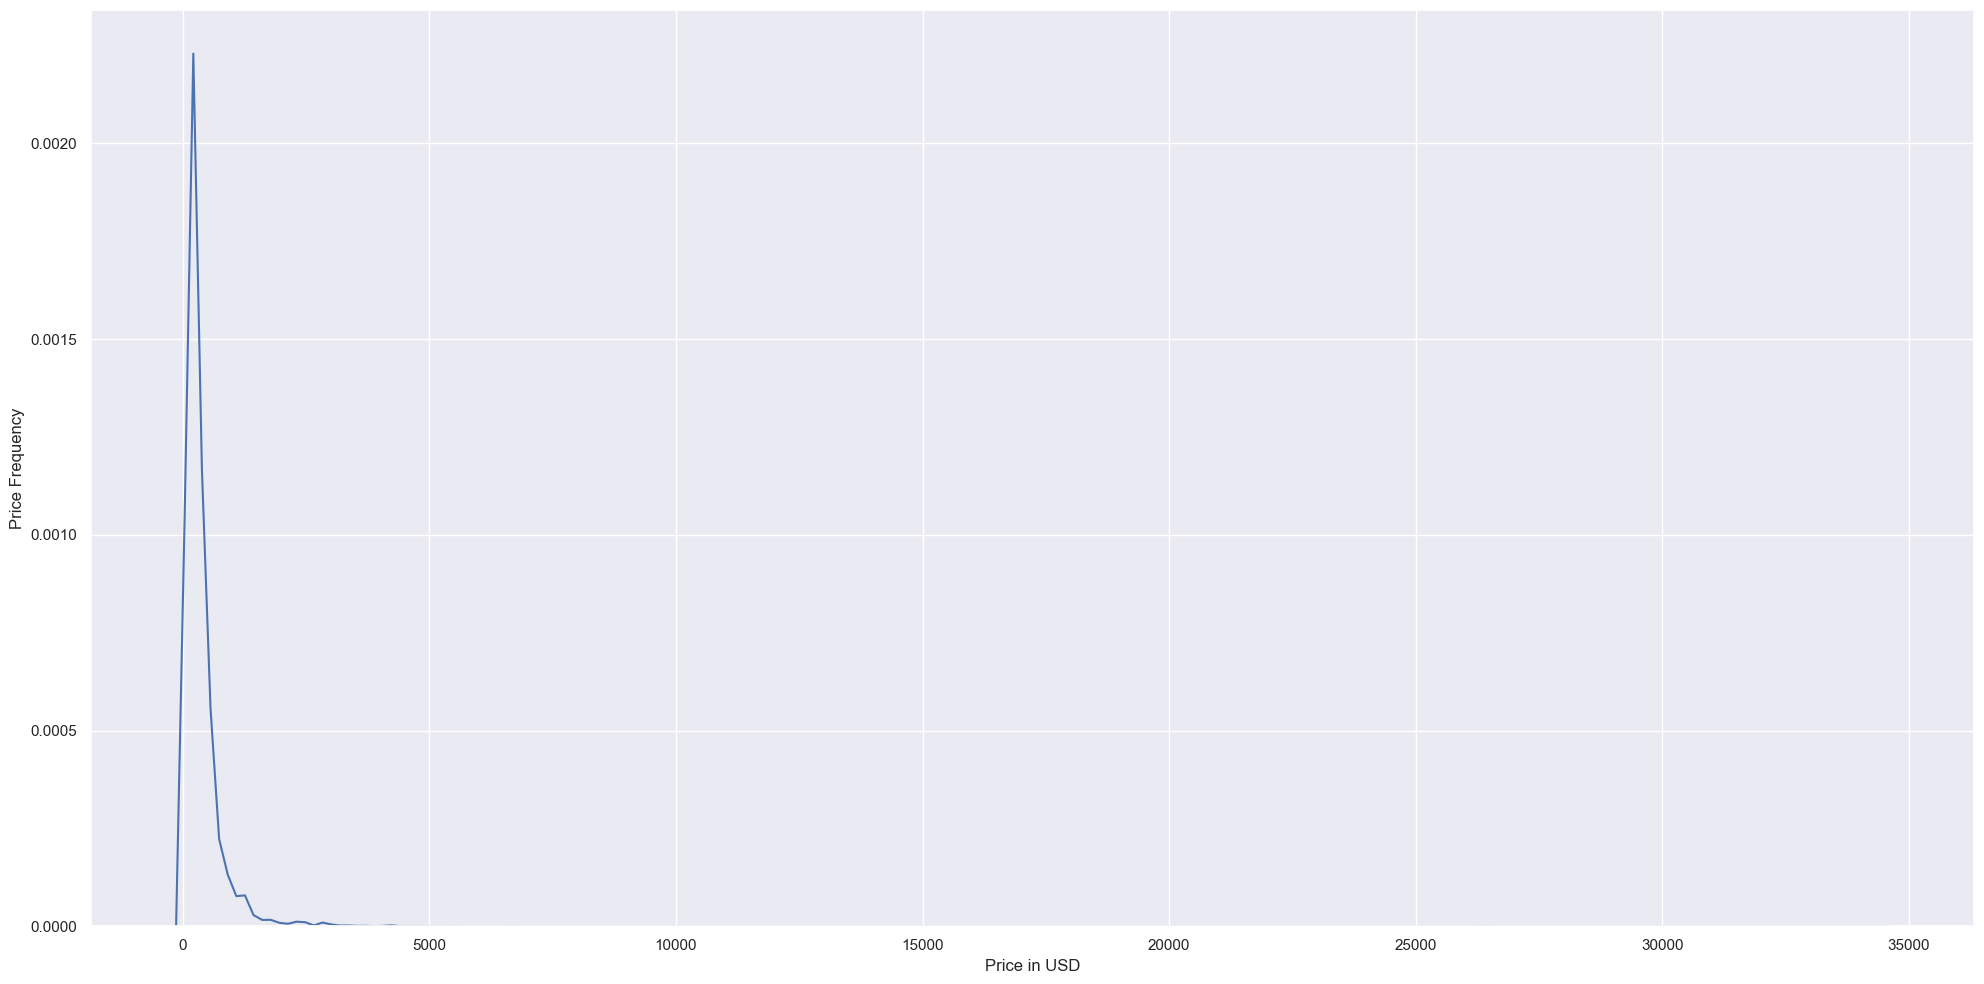

In [15]:
#visualise the price distribution
plt.figure(figsize=(20, 10))

sns.kdeplot(data = data, x = "Price_USD")

plt.xlabel("Price in USD")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(); plt.close()

In [16]:
#target gender analysis

data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

This shows the distribution of the customers buying jewelry, and women buy a lot more than men

In [17]:
data["Target_Gender"].value_counts(normalize=True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

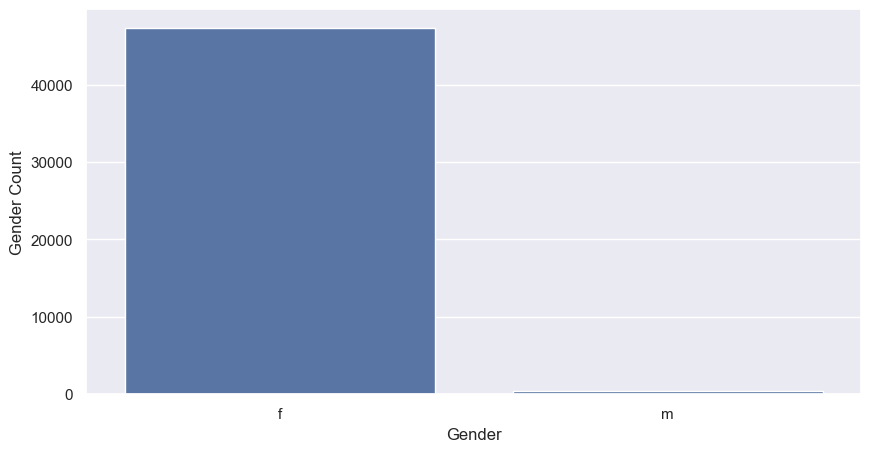

In [18]:
# Visualise target gender
plt.figure(figsize=(10, 5))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Count")

plt.show(); plt.close()

In [19]:
#jewelry category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
916.44                  1
1829.37                 1
132.53                  1
75.76                   1
253.77                  1
Name: count, Length: 218, dtype: int64

Checking the different categories of jewelry and it shows that there are a lot more different categories than expected

In [20]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

Viewing the full list of different categories, it shows tha data may be corrupted

In [21]:
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

extracting the real jewelry categories from the column

In [22]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [23]:
real_categories = data.loc[data["Category"].isin(categories)]

In [24]:
100 * data.isnull().sum()/len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

This shows the original data has 50% of the rows has null values

In [25]:
100 * real_categories.isnull().sum()/len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           3.614847
Price_USD          0.000000
User_ID            0.000000
Target_Gender     37.617558
Main_Color         2.228131
Main_Metal         0.092795
Main_Gem          20.328433
dtype: float64

This shows that with the corrupted data removed, the data with null values is now 38%

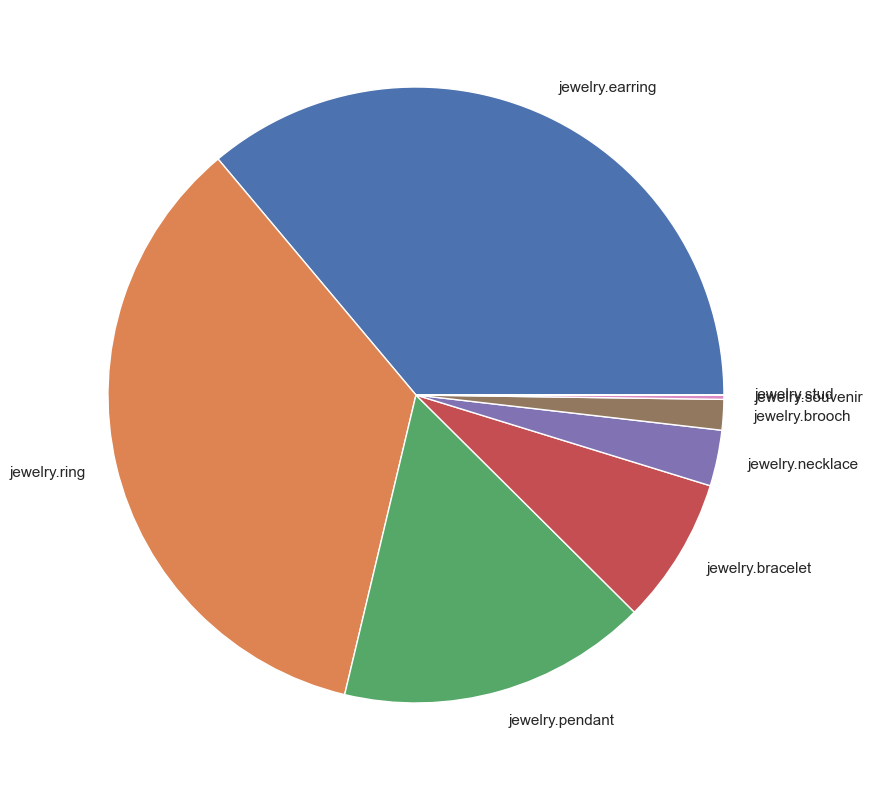

In [26]:
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(20, 10))

plt.pie(x = counts, labels= jewelry_categories)

plt.show(); plt.close()

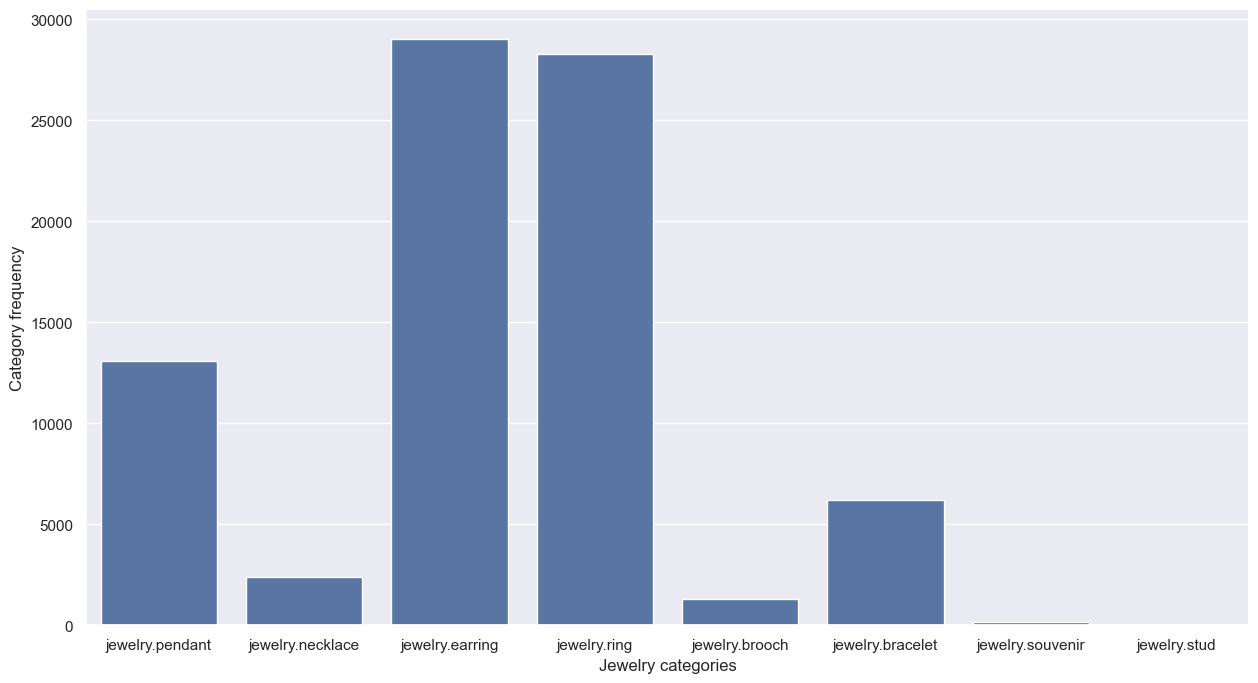

In [27]:
# category count plot
plt.figure(figsize=(15, 8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

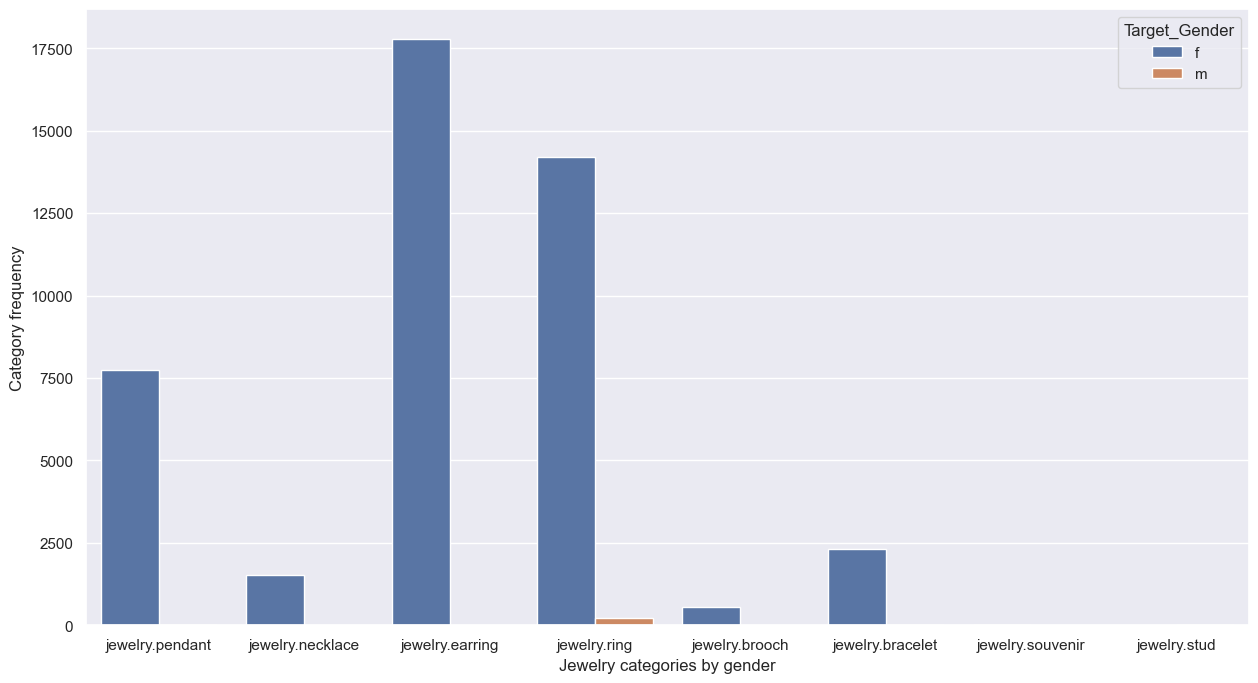

In [28]:
# jewelry category by gender
plt.figure(figsize=(15, 8))

sns.countplot(data = real_categories, x = "Category", hue="Target_Gender")

plt.xlabel("Jewelry categories by gender")
plt.ylabel("Category frequency")

plt.show(); plt.close()

In [29]:
# gender skew in original data
data["Target_Gender"].value_counts(normalize=True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [30]:
real_categories["Target_Gender"].value_counts(normalize=True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

Encoding the categorical values for data modelling

In [31]:
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [32]:
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [33]:
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [34]:
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [35]:
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [36]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


Dropping the columns that do not add value to the performance of the model

In [37]:
correlations = real_categories.drop(labels=["Order_Datetime", "Order_ID", "Product_ID", "User_ID"], axis=1).corr(method='spearman')

In [38]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


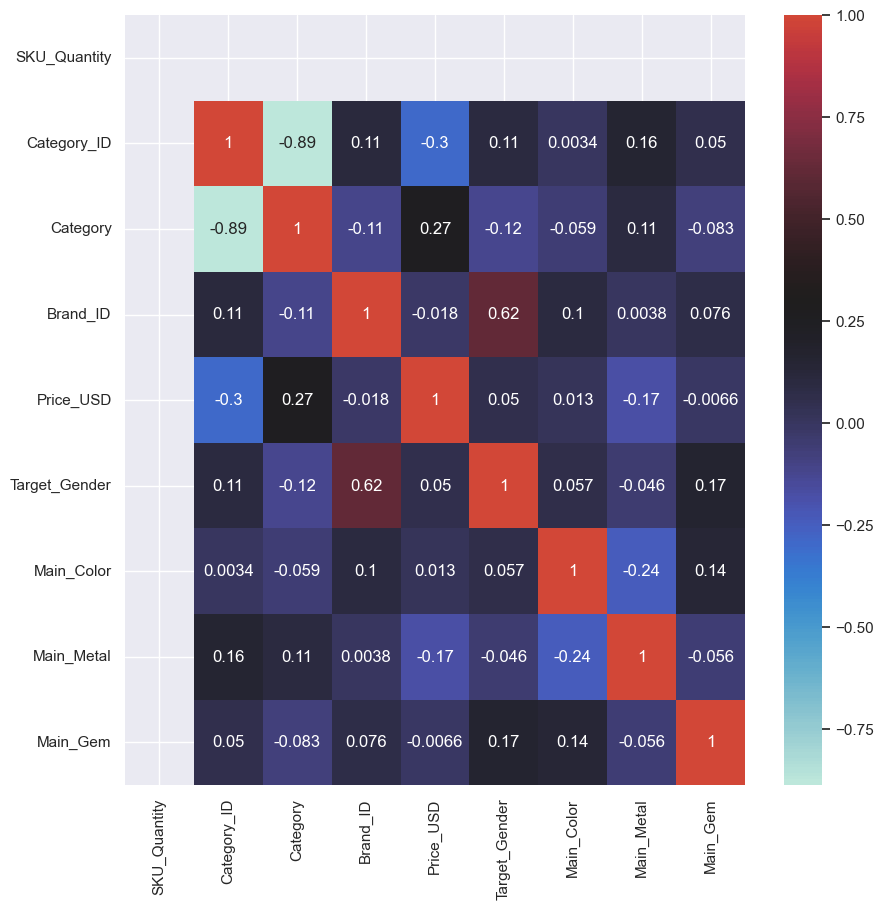

In [39]:
#correlation heatmap

plt.figure(figsize= (10,10))

sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

In [40]:
#set correlation limit
upper = 1
lower = .2

In [41]:
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [42]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

# Data Cleaning

In [51]:
columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "Product_ID",
    "User_ID",
    "Category_ID",
    "Order_Datetime"
]

In [ ]:
# eliminate unsued features
data.drop(labels=columns_to_eliminate, axis=1, inplace=True)

In [49]:
data.shape

(95910, 7)

In [50]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [52]:
#eliminate the unrealistic categories
data = data.loc[data["Category"].isin(categories), :]

In [53]:
data.shape

(80458, 7)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X, y = data.drop(labels=["Price_USD"], axis=1), data["Price_USD"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Data Modelling

1. Linear Regression
2. Extremely Random Forest (ExtraTrees)
3. Adaptive Boosting (Adaboost)
4. Catboost

In [60]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

In [80]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    # fix missing values
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
        ],
        remainder= "passthrough",
        sparse_threshold = 0
    )
    # one hot encode categorical features
    second_transformer = ColumnTransformer(
        transformers = [
            ("onehot", OneHotEncoder(), categorical_indices)
        ],
        remainder= "passthrough",
        sparse_threshold = 0
    )
    # label encode categorical features
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder= "passthrough",
        sparse_threshold = 0
    )

    steps = []

    if fill_missing:
        steps.append(("first", first_transformer))

    if label_encode:
        steps.append(("third", third_transformer))
    
    if one_hot:
        steps.append(("second", second_transformer))

    steps.append(("model", model))

    model_pipeline = Pipeline(steps = steps)

    return model_pipeline

In [63]:
#generate indices for categorical and all columns
columns = X.columns.tolist()

columns_indices = [columns.index(c) for c in columns]
categorical_features =[c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [64]:
categorical_indices

[0, 2, 3, 4, 5]

In [68]:
#Catboost model pipeline
cat_pipeline = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size=2),
    columns_indices,
    categorical_indices,
    fill_missing=False, one_hot=False, label_encode=True
)

In [69]:
# linear regression pipeline
lin_pipeline = generate_pipeline(
    LinearRegression(),
    columns_indices,
    categorical_indices,
    fill_missing=True, one_hot=True, label_encode=False
)

In [70]:
# adaboost pipeline
ada_pipeline = generate_pipeline(
    AdaBoostRegressor(loss="exponential", n_estimators=1000, learning_rate=0.01),
    columns_indices,
    categorical_indices,
    fill_missing=True, one_hot=True, label_encode=False
)

In [72]:
# extratrees pipeline
ext_pipeline = generate_pipeline(
    ExtraTreesRegressor(criterion= "friedman_mse", n_estimators=1000, bootstrap=True),
    columns_indices,
    categorical_indices,
    fill_missing=True, one_hot=True, label_encode=False
)

In [73]:
from sklearn.preprocessing import PowerTransformer

In [74]:
# transform target variable
cat_pipeline = TransformedTargetRegressor(regressor=cat_pipeline, transformer=PowerTransformer(method="box-cox"))
lin_pipeline = TransformedTargetRegressor(regressor=lin_pipeline, transformer=PowerTransformer(method="box-cox"))
ada_pipeline = TransformedTargetRegressor(regressor=ada_pipeline, transformer=PowerTransformer(method="box-cox"))
ext_pipeline = TransformedTargetRegressor(regressor=ext_pipeline, transformer=PowerTransformer(method="box-cox"))


In [81]:
# fit the catboost model
cat_pipeline.fit(X_train, y_train)

0:	learn: 0.9626389	total: 152ms	remaining: 25m 19s
1:	learn: 0.9243165	total: 158ms	remaining: 13m 11s
2:	learn: 0.8973870	total: 165ms	remaining: 9m 8s
3:	learn: 0.8698164	total: 170ms	remaining: 7m 4s
4:	learn: 0.8504521	total: 175ms	remaining: 5m 50s
5:	learn: 0.8339961	total: 181ms	remaining: 5m 2s
6:	learn: 0.8153934	total: 187ms	remaining: 4m 27s
7:	learn: 0.8003284	total: 194ms	remaining: 4m 1s
8:	learn: 0.7901487	total: 199ms	remaining: 3m 40s
9:	learn: 0.7803527	total: 204ms	remaining: 3m 23s
10:	learn: 0.7726428	total: 210ms	remaining: 3m 11s
11:	learn: 0.7624207	total: 216ms	remaining: 2m 59s
12:	learn: 0.7565214	total: 221ms	remaining: 2m 49s
13:	learn: 0.7491287	total: 228ms	remaining: 2m 42s
14:	learn: 0.7418851	total: 233ms	remaining: 2m 34s
15:	learn: 0.7355628	total: 238ms	remaining: 2m 28s
16:	learn: 0.7311649	total: 250ms	remaining: 2m 27s
17:	learn: 0.7276605	total: 257ms	remaining: 2m 22s
18:	learn: 0.7239058	total: 263ms	remaining: 2m 18s
19:	learn: 0.7191356	tot

,regressor,Pipeline(step...8C53B5B890>)])
,transformer,PowerTransfor...hod='box-cox')
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('ordinal', ...)]"
,remainder,'passthrough'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False


In [82]:
# fit the linear regression model
lin_pipeline.fit(X_train, y_train)

,regressor,Pipeline(step...egression())])
,transformer,PowerTransfor...hod='box-cox')
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False


In [83]:
# fit the adaboost model
ada_pipeline.fit(X_train, y_train)

,regressor,Pipeline(step...ators=1000))])
,transformer,PowerTransfor...hod='box-cox')
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False


In [84]:
# fit the extratrees model
ext_pipeline.fit(X_train, y_train)

,regressor,Pipeline(step...ators=1000))])
,transformer,PowerTransfor...hod='box-cox')
,func,None
,inverse_func,None
,check_inverse,True
,transformers,"[('imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False


# Model Evaluation

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [87]:
def generate_model_score(model, data, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [88]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} on training data: {train_score:.4f}")
    print(f"Test {metric_name} on testing data: {test_score:.4f}")
    print(f"Generalisation error: {train_score - test_score:.4f}")

    return

In [97]:
def test_model(model, data, metric_name, metric_function):
    train, test = data

    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)
    else:
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)

    return

In [90]:
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [91]:
#create data variables
data_ = [
    [X_train, y_train],
    [X_test, y_test]
]

In [98]:
# test catboost model
test_model(cat_pipeline, data_, metric_name, metric_function)

Train R2 on training data: 0.3238
Test R2 on testing data: 0.3238
Generalisation error: 0.0000
Train RMSE on training data: 356.8934
Test RMSE on testing data: 404.6156
Generalisation error: -47.7222


In [99]:
# test linear regression model
test_model(lin_pipeline, data_, metric_name, metric_function)

Train R2 on training data: 0.0721
Test R2 on testing data: 0.0593
Generalisation error: 0.0128
Train RMSE on training data: 418.0605
Test RMSE on testing data: 477.2244
Generalisation error: -59.1639


In [100]:
#test adaboost model
test_model(ada_pipeline, data_, metric_name, metric_function)

Train R2 on training data: 0.0724
Test R2 on testing data: 0.0623
Generalisation error: 0.0101
Train RMSE on training data: 418.0040
Test RMSE on testing data: 476.4690
Generalisation error: -58.4650


In [101]:
# test extratrees model
test_model(ext_pipeline, data_, metric_name, metric_function)

Train R2 on training data: 0.2202
Test R2 on testing data: 0.2400
Generalisation error: -0.0199
Train RMSE on training data: 383.2610
Test RMSE on testing data: 428.9373
Generalisation error: -45.6763


# Project Recommendation

All the models used for the training performed very bad. The catboost model performed the best because it is able to train even with missing data, however, they all peformed very badly. This is possibly because most of the data has missing values. The data also does not have enough features that can distinguish between the different prices. The data needs to be more detailed as well as more instances of sales to allow more opportunity to get the model right. Having the data being corrupted does not help either.